In [1]:
from matplotlib import pyplot, cm
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
nx = 41
ny = 41

l = 1.
h = 1.

u = numpy.ones(nx)
u[-1] = 0

dx = l/(nx-1)
dy = h/(ny-1)

l1_target = 1e-6

In [3]:
def L1norm(new, old):
    norm = numpy.sum(numpy.abs(new-old))
    return norm

In [4]:
psi = numpy.zeros((nx,ny))
omega = numpy.zeros((nx,ny))

x = numpy.linspace(0,l,nx)
y = numpy.linspace(0,h,ny)

omega[-1,1:-1] = - 3*u[1:-1]/dy - 1/2/dy**2*(8*psi[-2,1:-1] - psi[-3,1:-1])

In [5]:
def SolveStokesFlow(psi, u, l1_target):
        
    l1norm = 1
    
    while l1norm > l1_target:
                
        psid = psi.copy()
        psi[1:-1,1:-1] = 1/(2*(dx**2 + dy**2)) * ((psid[1:-1,2:] + psid[1:-1,:-2])*dy**2 + (psid[2:,1:-1] + psid[:-2,1:-1])*dx**2 + omega[1:-1,1:-1]*dx**2*dy**2)
        
        omegan = omega.copy()
        omega[1:-1,1:-1] = 0.25 * (omegan[1:-1,2:] + omegan[1:-1, :-2]+ omegan[2:, 1:-1] + omegan[:-2, 1:-1])   
        
        #B.C.
        omega[-1,1:-1] = - 3*u[1:-1]/dy - 1/2/dy**2*(8*psi[-2,1:-1] - psi[-3,1:-1])
        omega[0,1:-1] = - 1/2/dy**2*(8*psi[1,1:-1] - psi[2,1:-1])
        omega[1:-1,-1] = - 1/2/dx**2*(8*psi[1:-1,-2] - psi[1:-1,-3])
        omega[1:-1,0] = - 1/2/dx**2*(8*psi[1:-1,1] - psi[1:-1,2])
        
        l1norm = max(L1norm(omega, omegan), L1norm(psi, psid))
         
    return psi, omega

In [6]:
psi, omega = SolveStokesFlow(psi, u, l1_target)
print(numpy.round(psi[32,::8], 4))

[ 0.     -0.0575 -0.0944 -0.0944 -0.0575  0.    ]


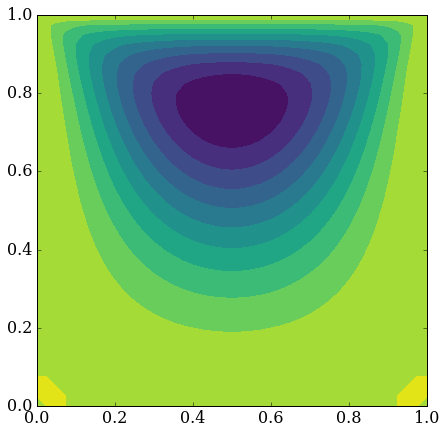

In [7]:
pyplot.figure(figsize=(7,7))
pyplot.contourf(x,y,psi,10, cmap=cm.viridis);

In [8]:
print('The maximum value of |ψ| within the cavity is {:.4f}'. format(numpy.amax(numpy.abs(psi))))

The maximum value of |ψ| within the cavity is 0.0998


In [9]:
print('The maximum value of |ω| within the cavity is {:.4f}'. format(numpy.amax(numpy.abs(omega))))

The maximum value of |ω| within the cavity is 78.1927
